In [ ]:
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/monkeypox-dataset.csv')
print(d)

       Patient_ID  Systemic Illnes  Rectal pain  Sore Throat  penile Oedema  \
0              10                2            0            1              1   
1              11                3            1            0              1   
2              12                3            0            1              1   
3              13                2            1            0              0   
4              14                4            1            1              1   
...           ...              ...          ...          ...            ...   
24995      124995                2            1            1              0   
24996      124996                3            0            1              1   
24997      124997                2            1            1              0   
24998      124998                4            0            1              0   
24999      124999                4            0            0              1   

       Oral Lesions  Solitary Lesion  Swollen Tonsi

In [ ]:
d.head()

Patient_ID  Systemic Illnes  Rectal pain  Sore Throat  penile Oedema  \
0          10                2            0            1              1   
1          11                3            1            0              1   
2          12                3            0            1              1   
3          13                2            1            0              0   
4          14                4            1            1              1   

   Oral Lesions  Solitary Lesion  Swollen Tonsils  HIV Infection  \
0             1                0                1              0   
1             1                0                0              1   
2             0                0                0              1   
3             0                1                1              1   
4             0                0                1              1   

   Sexually Transmitted Infection  Monkeypox  
0                               0          0  
1                               0          1  
2                               0          1  
3                               0          1  
4                               0          1

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Patient_ID                      25000 non-null  int64
 1   Systemic Illnes                 25000 non-null  int64
 2   Rectal pain                     25000 non-null  int64
 3   Sore Throat                     25000 non-null  int64
 4   penile Oedema                   25000 non-null  int64
 5   Oral Lesions                    25000 non-null  int64
 6   Solitary Lesion                 25000 non-null  int64
 7   Swollen Tonsils                 25000 non-null  int64
 8   HIV Infection                   25000 non-null  int64
 9   Sexually Transmitted Infection  25000 non-null  int64
 10  Monkeypox                       25000 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


SCATTER PLOT

In [ ]:
import matplotlib.pyplot as plt

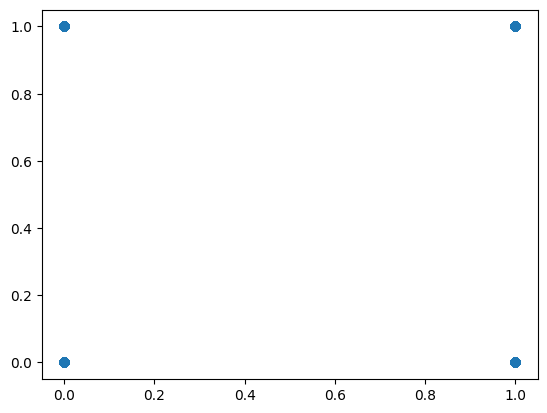

In [ ]:
x1=d['Rectal pain']
y=d['Monkeypox']
plt.scatter(x1,y)

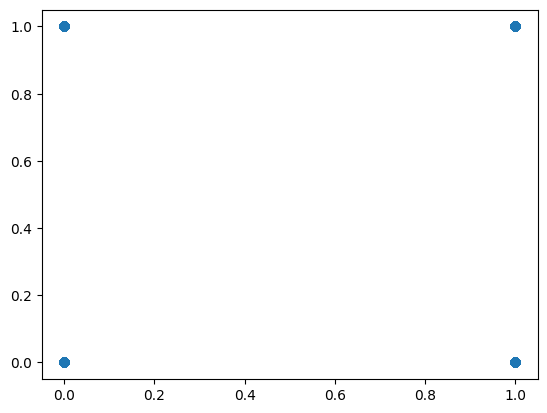

In [ ]:
x2=d['Sore Throat']
y=d['Monkeypox']
plt.scatter(x2,y)

CHECKING NULL VALUES

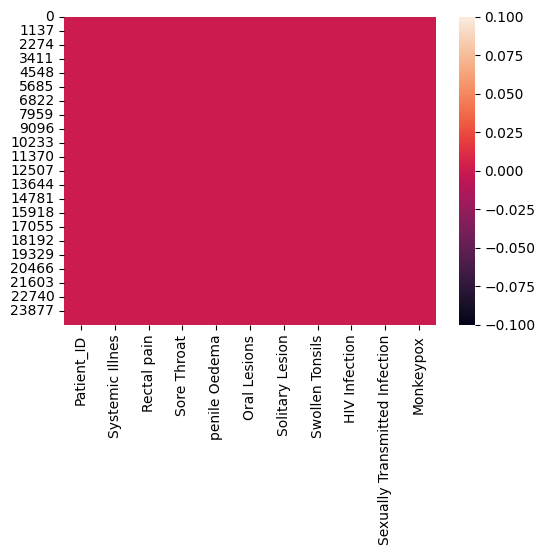

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def heat_map(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull()) 
  return plt.show()

heat_map(d)

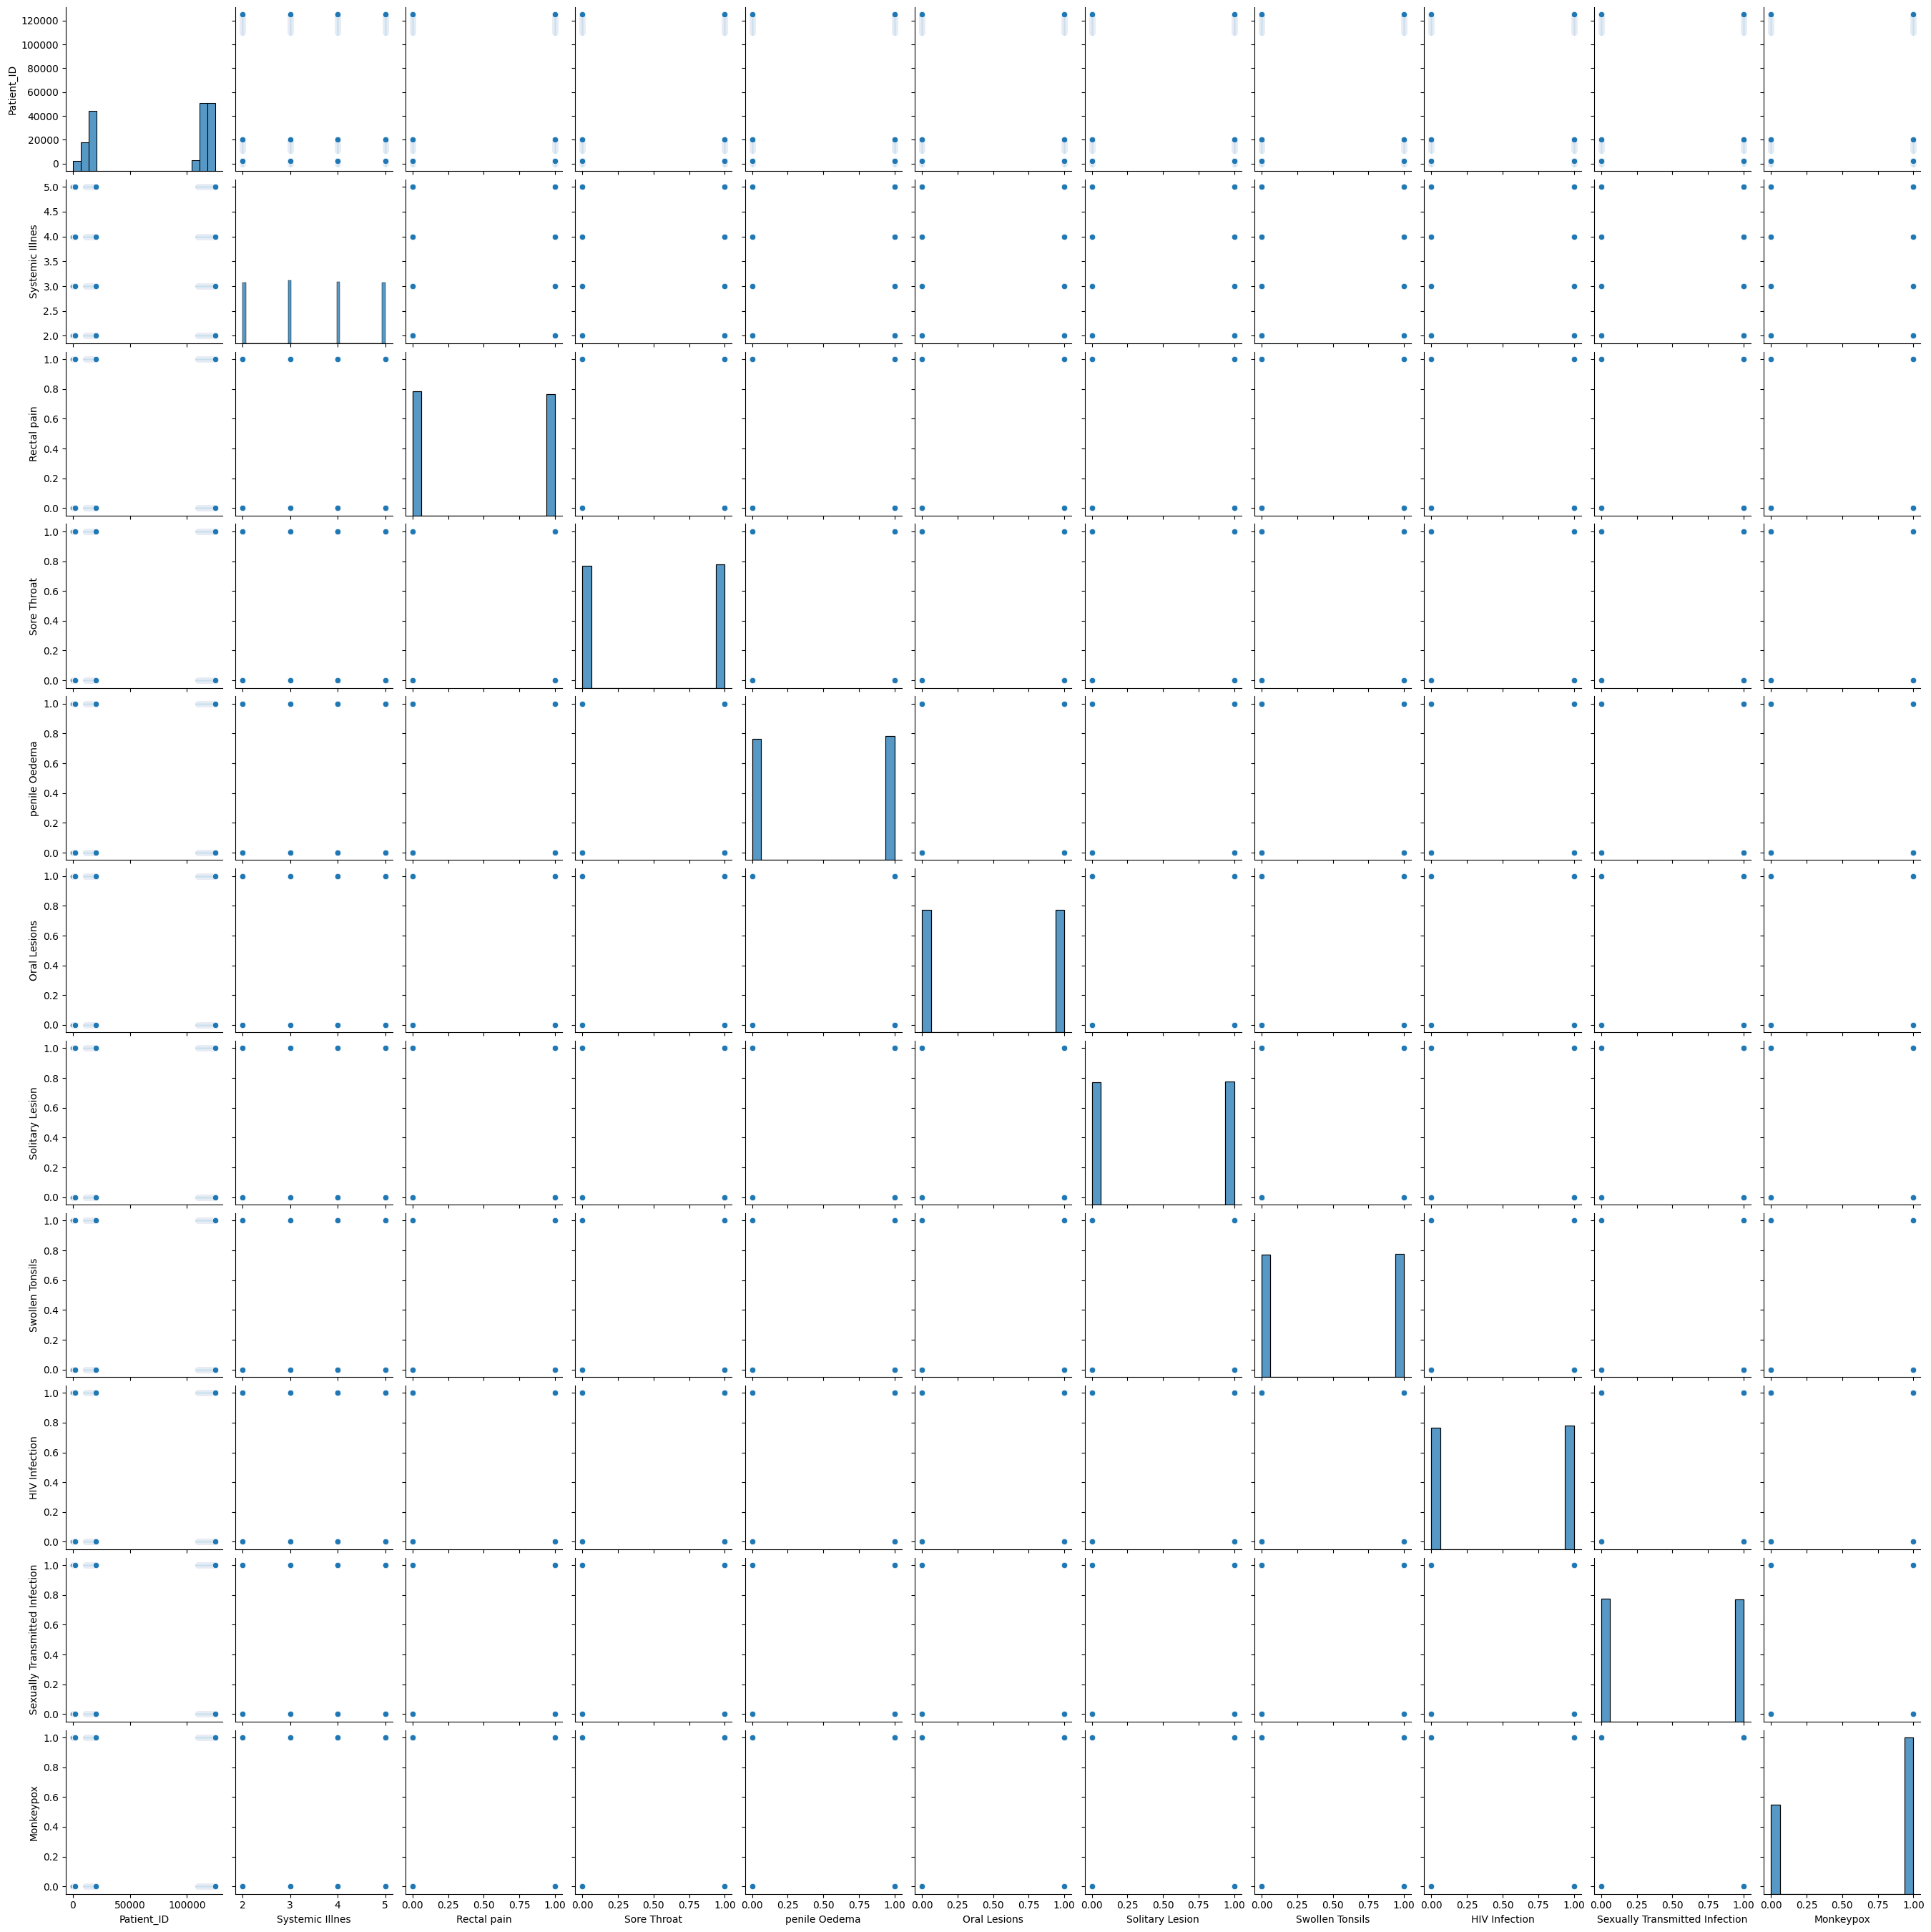

In [ ]:

sns.pairplot(d) #used for all rows and columns

CORRELATIONAL MATRIX

In [ ]:
corr_matrix=d.corr()
print(corr_matrix)

                                Patient_ID  Systemic Illnes  Rectal pain  \
Patient_ID                        1.000000        -0.002479    -0.006912   
Systemic Illnes                  -0.002479         1.000000    -0.005571   
Rectal pain                      -0.006912        -0.005571     1.000000   
Sore Throat                      -0.002636         0.013249     0.006214   
penile Oedema                     0.007524        -0.002319     0.005312   
Oral Lesions                     -0.013516         0.017959     0.007747   
Solitary Lesion                   0.002018        -0.000886     0.001147   
Swollen Tonsils                   0.009794         0.003142     0.002113   
HIV Infection                     0.005093         0.006004     0.005764   
Sexually Transmitted Infection    0.002190        -0.006781     0.000666   
Monkeypox                        -0.002936        -0.010841     0.140727   

                                Sore Throat  penile Oedema  Oral Lesions  \
Patient_ID 

COVARIENCE MATRIX HEATMAP

<function matplotlib.pyplot.show(close=None, block=None)>

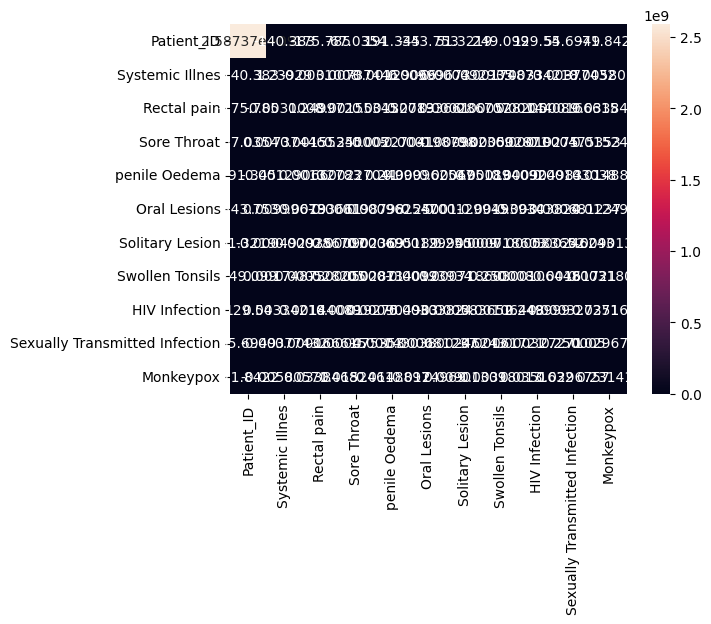

In [ ]:
cov_matrix=pd.DataFrame.cov(d)
sns.heatmap(cov_matrix,annot=True,fmt='g')
plt.show

In [ ]:
import matplotlib.pyplot as plt

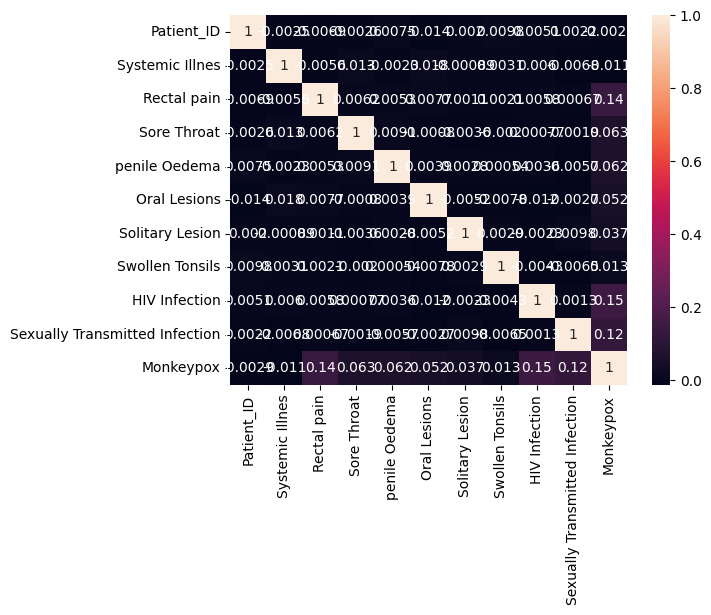

In [ ]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

LOGISTICREGRESSION



In [ ]:
x=d.iloc[:,:-1].values
y=d.iloc[:,-1:].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#Normalising the data - Standard Scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(xtrain)   #Normalizing
X_test=sst.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
ypred=model.predict(xtest)

In [ ]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
xtest

array([[114149,      2,      1, ...,      1,      1,      0],
       [ 18946,      5,      1, ...,      0,      1,      0],
       [122378,      4,      0, ...,      0,      1,      0],
       ...,
       [ 18463,      5,      1, ...,      0,      0,      0],
       [ 16258,      2,      0, ...,      1,      0,      1],
       [ 14183,      2,      0, ...,      0,      0,      1]])

In [ ]:
'''
print("Predicted score of the training dataset is ",model.score(xtrain,ytrain)*100)
print("Predicted score of the testing dataset is ",model.score(xtest,ytest)*100)
print("Overall Accuracy is ",model.score(sst.transform(x),y)*100)
'''

'\nprint("Predicted score of the training dataset is ",model.score(xtrain,ytrain)*100)\nprint("Predicted score of the testing dataset is ",model.score(xtest,ytest)*100)\nprint("Overall Accuracy is ",model.score(sst.transform(x),y)*100)\n'

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, ypred))

Confusion Matrix : 
 [[   0 2262]
 [   0 3988]]
Accuracy :  0.63808


In [ ]:
model.score(x,y)

0.63636

KNN ALGORITHM

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#normalizing(to transform features to be o a similar scale) the data-standardscaler
# standardscaler it helps converting all numerical values into the one range
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)
'''
print ('train value:',xtrain[0:1, :])
print ('test value:',xtest[0:1, :])
'''

"\nprint ('train value:',xtrain[0:1, :])\nprint ('test value:',xtest[0:1, :])\n"

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20) #20 is k value

In [ ]:
knn.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
print("predicted value for training value",knn.score(xtrain,ytrain))
print("predicted value for testing value",knn.score(xtest,ytest))
print(" accuracy value",knn.score(sc_x.transform(x),y))

predicted value for training value 0.69056
predicted value for testing value 0.65584
 accuracy value 0.68188


In [ ]:
from sklearn.metrics import confusion_matrix
knns=confusion_matrix(ytest,y_pred)
print("Confusion matrix:\n",knns)

Confusion matrix:
 [[ 920 1342]
 [1606 2382]]


Cross validation



/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

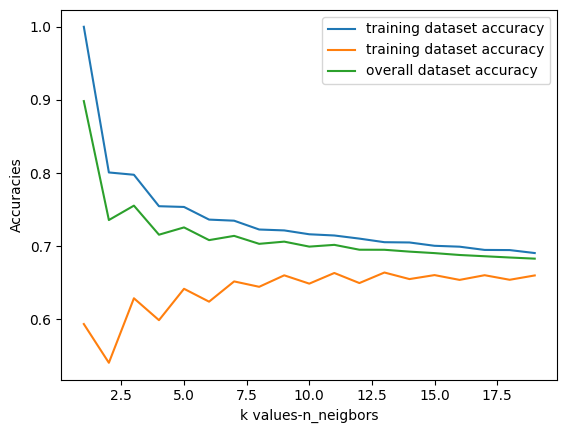

In [ ]:

#this code is useful to find best k value using graphs
import numpy as np
neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#loop over k values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain,ytrain)
  #compute the training and testing accuracy of ML model
  train_accuracy[i]=knn.score(xtrain,ytrain)
  test_accuracy[i]=knn.score(xtest,ytest)

  #overall score
  overall_accuracy[i]=knn.score(sc_x.transform(x),y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label="training dataset accuracy") 
plt.plot(neighbors,test_accuracy,label="training dataset accuracy") 
plt.plot(neighbors,overall_accuracy,label="overall dataset accuracy")
plt.legend() 
plt.xlabel('k values-n_neigbors')
plt.ylabel('Accuracies')
plt.show()


Naive Bayes Classifier




In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
print("Training Accuracy",nb.score(xtrain,ytrain))
print("Testing Accuracy",nb.score(xtest,ytest))
print("Overall Accuracy:",nb.score(sst.transform(x),y))
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Training Accuracy 0.67616
Testing Accuracy 0.68368
Overall Accuracy: 0.67804
Accuracy :  0.52832


In [ ]:
y_pred=nb.predict(xtest)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
nbb=confusion_matrix(ytest,y_pred)
print("Confusion matrix:\n",nbb)

Confusion matrix:
 [[ 629 1633]
 [ 344 3644]]


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
SVM= svm.SVC()

In [ ]:
SVM.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
print("Training Accuracy",SVM.score(xtrain,ytrain))
print("Testing Accuracy",SVM.score(xtest,ytest))
print("Overall Accuracy:",SVM.score(sc_x.transform(x),y))

Training Accuracy 0.696
Testing Accuracy 0.69344
Overall Accuracy: 0.69536


In [ ]:
y_pred=SVM.predict(xtest)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
SVMS=confusion_matrix(ytest,y_pred)
print("Confusion matrix:\n",SVMS)

Confusion matrix:
 [[ 655 1607]
 [ 309 3679]]


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy",dtc.score(xtrain,ytrain))
print("Testing Accuracy",dtc.score(xtest,ytest))
print("Overall Accuracy:",dtc.score(sst.transform(x),y))

Training Accuracy 1.0
Testing Accuracy 0.60352
Overall Accuracy: 0.90088


In [ ]:
y_pred=dtc.predict(xtest)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
dtcs=confusion_matrix(ytest,y_pred)
print("Confusion matrix:\n",dtcs)

Confusion matrix:
 [[1054 1208]
 [1270 2718]]


RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(xtrain,ytrain)

<ipython-input-60-6bd64776e0f5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xtrain,ytrain)


RandomForestClassifier()

In [ ]:
xtrain

array([[ 0.90613629,  1.3531417 , -0.98696495, ...,  0.99733688,
        -1.01007744,  1.00534763],
       [ 0.68247962,  0.45277594, -0.98696495, ..., -1.00267023,
        -1.01007744,  1.00534763],
       [-1.13801369,  0.45277594,  1.01320721, ...,  0.99733688,
        -1.01007744, -0.99468081],
       ...,
       [-1.11001972, -0.44758983,  1.01320721, ...,  0.99733688,
         0.9900231 ,  1.00534763],
       [ 0.679273  , -0.44758983,  1.01320721, ...,  0.99733688,
        -1.01007744,  1.00534763],
       [-1.24995022,  1.3531417 ,  1.01320721, ..., -1.00267023,
         0.9900231 , -0.99468081]])

In [ ]:
ytrain = ytrain.reshape(-1, 1)
ytrain

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
print("Training Accuracy",rfc.score(xtrain,ytrain))
print("Testing Accuracy",rfc.score(xtest,ytest))
print("Overall Accuracy:",rfc.score(sst.transform(x),y))

Training Accuracy 0.9999466666666667
Testing Accuracy 0.60464
Overall Accuracy: 0.90112


In [ ]:
y_pred=rfc.predict(xtest)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
rfcs=confusion_matrix(ytest,y_pred)
print("Confusion matrix:\n",rfcs)

Confusion matrix:
 [[ 994 1268]
 [1203 2785]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_model = accuracy_score(y,model.predict(sc_x.transform(x)))
print("Logistic regression:",accuracy_model)
accuracy_nb = accuracy_score(y,nb.predict(sc_x.transform(x)))
print("navie bayes;",accuracy_nb)
accuracy_knn = accuracy_score(y,knn.predict(sc_x.transform(x)))
print("KNN:",accuracy_knn)
accuracy_SVM = accuracy_score(y,SVM.predict(sc_x.transform(x)))
print("Support vector machine:",accuracy_SVM)
accuracy_dtc = accuracy_score(y,dtc.predict(sc_x.transform(x)))
print("Descision tree:",accuracy_dtc)
accuracy_rfc = accuracy_score(y,rfc.predict(sc_x.transform(x)))
print("Random forest:",accuracy_rfc)

Logistic regression: 0.52604
navie bayes; 0.67804
KNN: 0.68312
Support vector machine: 0.69536
Descision tree: 0.90088
Random forest: 0.90112


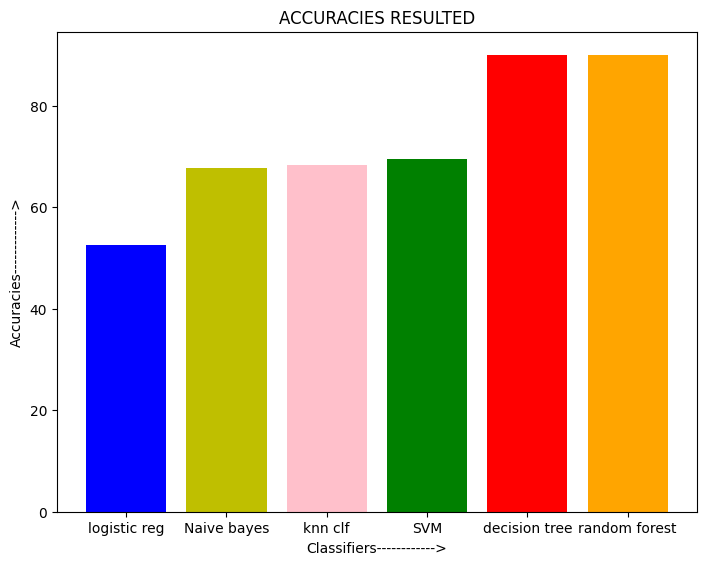

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','Naive bayes','knn clf','SVM','decision tree','random forest']

accuracy = [accuracy_model*100,accuracy_nb*100,accuracy_knn*100,accuracy_SVM*100,accuracy_dtc*100,accuracy_rfc*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')


ax.bar(algo[3],accuracy[3],color = 'green')

ax.bar(algo[4],accuracy[4],color = 'r')

ax.bar(algo[5],accuracy[5],color = 'orange')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()

DEPLOYMENT PHASE

In [ ]:
#Deployment
#1-means monkeypox disease is not there
#0-means monkeypox
Patient_ID=int(input('enter the patient_ID:'))
Systemic_Illnes=int(input('enter the Systemic_Illnes:'))
Rectal_pain=int(input('enter the Rectal_Pain:'))
Sore_Throat=int(input('enter the Sore_Throat:'))
penile_Oedema=int(input('enter the Penile_Oedema:'))
Oral_Lesions=int(input('enter the Oral_Lesions:'))
Solitary_Lesion=int(input('enter the Solitary_Lession:'))
Swollen_Tonsils=int(input('enter the Swollen_Tonsils:'))
HIV_Infection=int(input('enter the HIV_Infection:'))
Sexually_Transmitted_Infection=int(input('enter the Sexually_Transmitted_Infection:'))
inputs=sc_x.transform([[Patient_ID,Systemic_Illnes,Rectal_pain,Sore_Throat,penile_Oedema,Oral_Lesions,Solitary_Lesion,
                        Swollen_Tonsils,HIV_Infection,Sexually_Transmitted_Infection]])#again we have normalization
print('MONKEYPOX:',rfc.predict(inputs))

enter the patient_ID:3
enter the Systemic_Illnes:1
enter the Rectal_Pain:0
enter the Sore_Throat:1
enter the Penile_Oedema:1
enter the Oral_Lesions:0
enter the Solitary_Lession:0
enter the Swollen_Tonsils:1
enter the HIV_Infection:0
enter the Sexually_Transmitted_Infection:0
MONKEYPOX: [0]
